In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import statistics

In [7]:
df = pd.read_csv(f'./data/finalMergedSet.csv')
df

,date,visitor,home,visitor_points,home_points
0,2015-10-02,Denver Nuggets,LA Clippers,96.0,103.0
1,2015-10-03,New Orleans Pelicans,Indiana Pacers,110.0,105.0
2,2015-10-03,Charlotte Hornets,Orlando Magic,106.0,100.0
3,2015-10-04,Charlotte Hornets,Miami Heat,90.0,77.0
4,2015-10-04,LA Clippers,Toronto Raptors,73.0,93.0
...,...,...,...,...,...
12792,2024-11-04,Philadelphia 76ers,Phoenix Suns,116.0,118.0
12793,2024-11-04,Indiana Pacers,Dallas Mavericks,134.0,127.0
12794,2024-11-04,Sacramento Kings,Miami Heat,111.0,110.0
12795,2024-11-04,Los Angeles Lakers,Detroit Pistons,103.0,115.0


In [26]:
# Take games between chosen years
start_year = 2021
current_year = dt.datetime.now().year

# Convert to datetime data type
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Filtered the dataframe for games between start year and current year
filtered_df = df[(df['date'].dt.year >= start_year) & (df['date'].dt.year <= current_year)]

# Reset data frame
filtered_df = filtered_df.reset_index(drop=True)
filtered_df

,date,visitor,home,visitor_points,home_points
0,2021-01-01,Boston Celtics,Detroit Pistons,93.0,96.0
1,2021-01-01,Los Angeles Lakers,San Antonio Spurs,109.0,103.0
2,2021-01-01,LA Clippers,Utah Jazz,100.0,106.0
3,2021-01-01,Washington Wizards,Minnesota Timberwolves,130.0,109.0
4,2021-01-01,Atlanta Hawks,Brooklyn Nets,114.0,96.0
...,...,...,...,...,...
5602,2024-11-04,Philadelphia 76ers,Phoenix Suns,116.0,118.0
5603,2024-11-04,Indiana Pacers,Dallas Mavericks,134.0,127.0
5604,2024-11-04,Sacramento Kings,Miami Heat,111.0,110.0
5605,2024-11-04,Los Angeles Lakers,Detroit Pistons,103.0,115.0


Enter the away team:  Dallas Mavericks
Enter the home team:  Golden State Warriors
Enter the first line for the over/under bet:  230.5


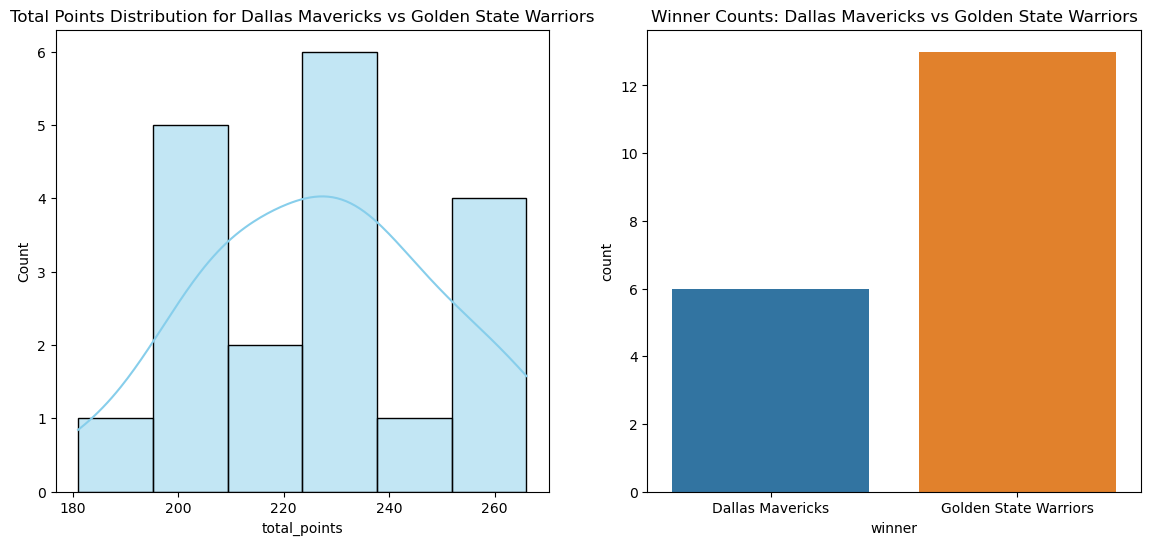

Statistics of Dallas Mavericks vs Golden State Warriors


Mean: 227.0
Standard Deviation: 22.705848487901868
------------------------------------
z-score for 223.5: -0.15
z-score for 224.5: -0.11
z-score for 225.5: -0.07
z-score for 226.5: -0.02
z-score for 227.5: 0.02
z-score for 228.5: 0.07
z-score for 229.5: 0.11
z-score for 230.5: 0.15
z-score for 231.5: 0.20
z-score for 232.5: 0.24
z-score for 233.5: 0.29
z-score for 234.5: 0.33
z-score for 235.5: 0.37
z-score for 236.5: 0.42
z-score for 237.5: 0.46


,date,visitor,home,visitor_points,home_points,total_points,winner
0,2021-02-04,Golden State Warriors,Dallas Mavericks,147.0,116.0,263.0,Dallas Mavericks
1,2021-02-06,Golden State Warriors,Dallas Mavericks,132.0,134.0,266.0,Golden State Warriors
2,2021-04-27,Dallas Mavericks,Golden State Warriors,133.0,103.0,236.0,Dallas Mavericks
3,2022-01-05,Golden State Warriors,Dallas Mavericks,82.0,99.0,181.0,Golden State Warriors
4,2022-01-25,Dallas Mavericks,Golden State Warriors,92.0,130.0,222.0,Golden State Warriors
5,2022-02-27,Dallas Mavericks,Golden State Warriors,107.0,101.0,208.0,Dallas Mavericks
6,2022-03-03,Golden State Warriors,Dallas Mavericks,113.0,122.0,235.0,Golden State Warriors
7,2022-05-18,Dallas Mavericks,Golden State Warriors,87.0,112.0,199.0,Golden State Warriors
8,2022-05-20,Dallas Mavericks,Golden State Warriors,117.0,126.0,243.0,Golden State Warriors
9,2022-05-22,Golden State Warriors,Dallas Mavericks,109.0,100.0,209.0,Dallas Mavericks


In [94]:
def possible_outcome(dataframe, away_team, home_team, first_line): 
    # Filter the dataframe for the specific matchup
    matchup_game = dataframe.loc[
        ((dataframe['visitor'] == away_team) & (dataframe['home'] == home_team)) | 
        ((dataframe['visitor'] == home_team) & (dataframe['home'] == away_team))
        ].copy()
    
    # Add a 'total_points' column 
    matchup_game['total_points'] = matchup_game['visitor_points'] + matchup_game['home_points']
    
    # Sort by date
    matchup_game = matchup_game.sort_values(by='date').reset_index(drop=True)
    
    # Determine the winner
    matchup_game['winner'] = matchup_game.apply(
        lambda row: home_team if row['home_points'] > row['visitor_points'] else away_team, 
        axis=1
    )
    
    # Games with zero points are considered to be postponed
    # Keep rows where total_points is not zero
    matchup_game = matchup_game.loc[matchup_game['total_points'] != 0]


    # Calculate Q1, Q3 and IQR
    Q1 = matchup_game['total_points'].quantile(0.25)
    Q3 = matchup_game['total_points'].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier thresholds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter games where total points are not outliers
    # Create matches dataframe
    matches = matchup_game[(matchup_game['total_points'] >= lower_bound) & (matchup_game['total_points'] <= upper_bound)]
    matches = matches.reset_index(drop=True)
        
    # Create side-by-side plots
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
      
    # Plot total points distribution with a KDE
    sns.histplot(data=matches, x ='total_points', kde=True, ax=axes[0], color="skyblue")
    axes[0].set_title(f'Total Points Distribution for {away_team} vs {home_team}')
    
    # Plot the winner count    
    sns.countplot(data=matches, x='winner', ax=axes[1], hue='winner')
    axes[1].set_title(f'Winner Counts: {away_team} vs {home_team}')
        
    # Display the plots
    plt.show()
    
     # Calculate a z-score from a provided mean and standard deviation
    mean = matches['total_points'].mean()
    standard_deviation = matches['total_points'].std()
   
    # Create array of UNDER/OVER values starting with given first line
    under_over_lines = [first_line + i for i in range(-7, 8)]
    
    # Display basic statics of team matchup
    print(f'Statistics of {away_team} vs {home_team}')
    print('\n')
    print(f'Mean: {mean}')
    print(f'Standard Deviation: {standard_deviation}')

    print('------------------------------------')
    # Display the z-scores for each line score
    for line in under_over_lines:
        zscore = statistics.NormalDist(mean, standard_deviation).zscore(line)
        print(f'z-score for {line}: {zscore:.2f}')

    # print('------------------------------------')

    # Find percentage of games between specified range
    # total_games = len(matchup_game)
    # games_in_range = matchup_game[(matchup_game['total_points'] >= lower_bound) & (matchup_game['total_points'] <= upper_bound)]
    # percentage = (len(games_in_range) / total_games) * 100
    # print(f"Percentage of games with total scores between {lower_bound} and {upper_bound}: {percentage:.2f}%")
    # print('------------------------------------')
    
    return matches

away_team = input("Enter the away team: ")
home_team = input("Enter the home team: ")
first_line = float(input("Enter the first line for the over/under bet: "))


possible_outcome(filtered_df, away_team, home_team, first_line)

In [12]:
teams = df['visitor'].unique()
teams.sort()
teams

array(['Atlanta Hawks', 'Boston Celtics', 'Brooklyn Nets',
       'Charlotte Hornets', 'Chicago Bulls', 'Cleveland Cavaliers',
       'Dallas Mavericks', 'Denver Nuggets', 'Detroit Pistons',
       'Golden State Warriors', 'Houston Rockets', 'Indiana Pacers',
       'LA Clippers', 'Los Angeles Lakers', 'Memphis Grizzlies',
       'Miami Heat', 'Milwaukee Bucks', 'Minnesota Timberwolves',
       'New Orleans Pelicans', 'New York Knicks', 'Oklahoma City Thunder',
       'Orlando Magic', 'Philadelphia 76ers', 'Phoenix Suns',
       'Portland Trail Blazers', 'Sacramento Kings', 'San Antonio Spurs',
       'Toronto Raptors', 'Utah Jazz', 'Washington Wizards'], dtype=object)